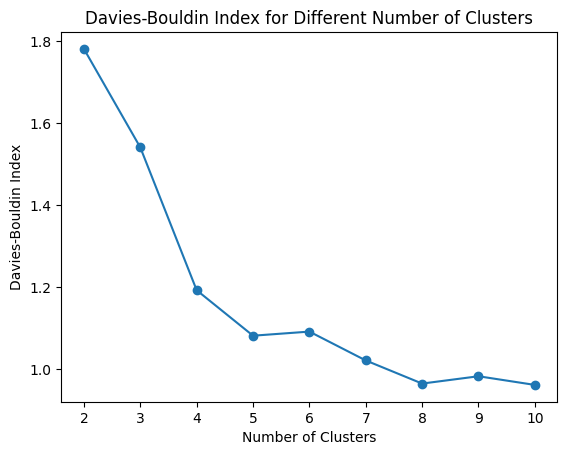

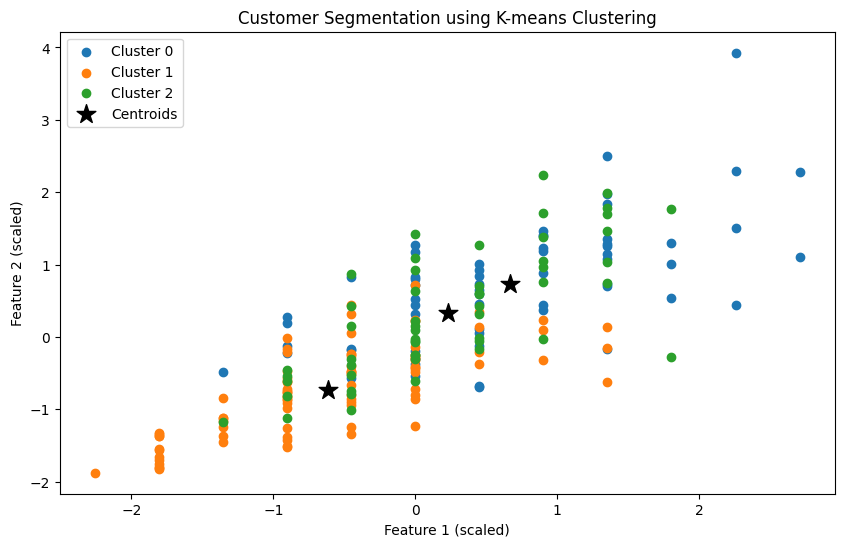

Davies-Bouldin Index for k=3: 1.5408905857884336


In [1]:


!pip install scikit-learn

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Feature Engineering
# Aggregate transaction data per customer
customer_transactions = transactions_df.groupby('CustomerID').agg(
    total_transactions=('TransactionID', 'count'),
    total_spent=('TotalValue', 'sum'),
    average_spent=('TotalValue', 'mean')
).reset_index()

# Merge customer profile and transaction data
merged_df = pd.merge(customers_df, customer_transactions, on='CustomerID', how='left')

# Fill NaN values with 0 for total_transactions, total_spent, average_spent
merged_df.fillna(0, inplace=True)

# Select relevant features for clustering
features = ['Region', 'total_transactions', 'total_spent', 'average_spent']
X = merged_df[features]

# Convert categorical feature 'Region' to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Region'], drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using Davies-Bouldin Index
db_index_values = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    db_index = davies_bouldin_score(X_scaled, kmeans.labels_)
    db_index_values.append(db_index)

# Plot the Davies-Bouldin index values
plt.plot(range(2, 11), db_index_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different Number of Clusters')
plt.show()


# Select the number of clusters based on the Davies-Bouldin Index plot
optimal_k = 3  # Choose based on the plot. Example: Elbow method or lowest DB Index.
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
merged_df['Cluster'] = kmeans.labels_

# Visualization
plt.figure(figsize=(10, 6))

for cluster in range(optimal_k):
  plt.scatter(X_scaled[merged_df['Cluster'] == cluster, 0], X_scaled[merged_df['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='*', label='Centroids')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('Customer Segmentation using K-means Clustering')
plt.legend()
plt.show()

# Calculate Davies-Bouldin index for chosen k
db_index = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index for k={optimal_k}: {db_index}")